In [144]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../project")

from common.torch_utils import module_is_trainable
import torch
import torch.nn as nn
import networkx as nx
import torch.nn.utils.prune as prune
import matplotlib.pyplot as plt

from common.nxutils import *
from common.constants import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
class SimpleMLP(nn.Module):
    """A mini mlp for demo purposes."""
    def __init__(self, shape: torch.Size):
        super().__init__()

        modules = [nn.Linear(shape[0], shape[1])]
        for i in range(1, len(shape) - 1):
            modules.append(nn.ReLU())
            in_dim = shape[i]
            out_dim = shape[i+1]
            modules.append(nn.Linear(in_dim, out_dim))

        self.modules = modules
        self.model = nn.Sequential(*modules)

shape = [4,15,15,2]
torch.manual_seed(0)
model = SimpleMLP(shape)

modules = [m for m in model.modules if module_is_trainable(m)]

params = []
params.extend([(module, 'weight') for module in modules])
params.extend([(module, 'bias') for module in modules])

task_description = ('moons' , (2, 1)), ('circles', (2, 1))
gm = GraphManager(model, shape, task_description)

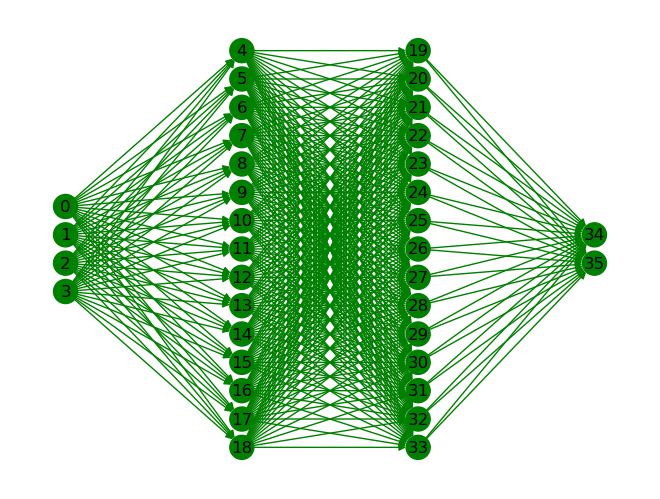

#unproductive params(frag): 0, []
#unproductive params(prod): 0, []
unpr : {'existing': {}, 'pruned': {}}
zomb : {'existing': {}, 'pruned': {}}
subn : 1


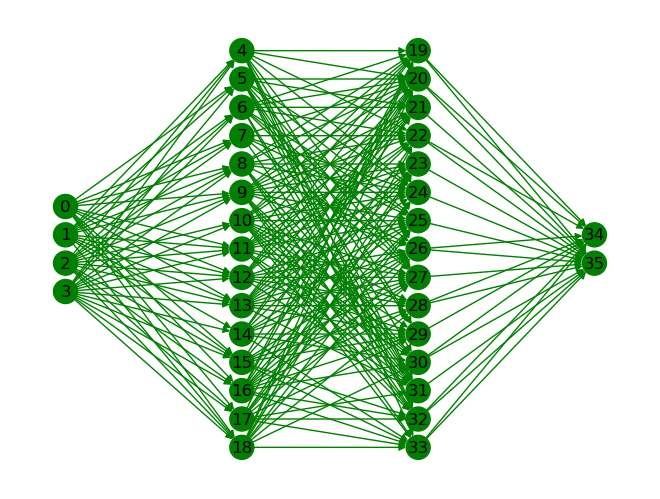

#unproductive params(frag): 0, []
#unproductive params(prod): 0, []
unpr : {'existing': {}, 'pruned': {}}
zomb : {'existing': {}, 'pruned': {}}
subn : 2


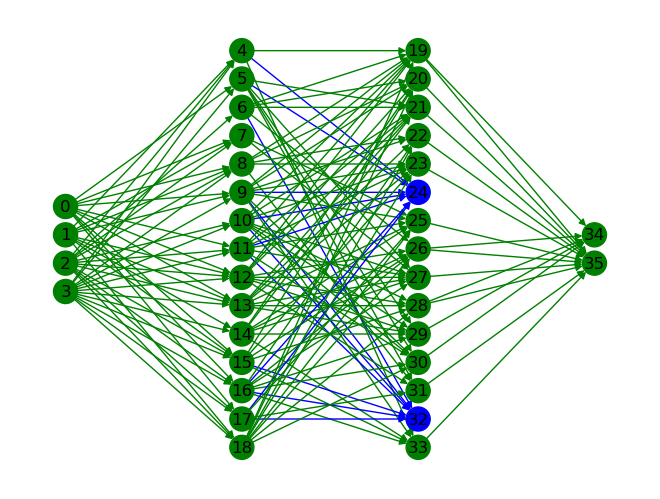

#unproductive params(frag): 0, []
#unproductive params(prod): 16, []
unpr : {'existing': {(5, 24): 0, (16, 32): 0, (17, 32): 0, (10, 32): 0, (4, 24): 0, (16, 24): 0, 24: 0, (17, 24): 0, 32: 0, (10, 24): 0, (9, 32): 0, (11, 32): 0, (15, 32): 0, (9, 24): 0, (6, 32): 0, (11, 24): 0}, 'pruned': {}}
zomb : {'existing': {}, 'pruned': {}}
subn : 3


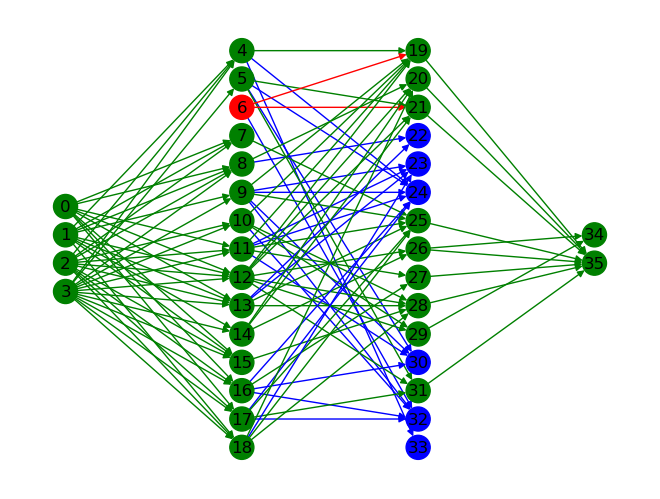

#unproductive params(frag): 0, []
#unproductive params(prod): 28, []
unpr : {'existing': {(5, 24): 1, (16, 32): 1, (17, 32): 1, (10, 32): 1, (4, 24): 1, (16, 24): 1, 24: 1, (17, 24): 1, 32: 1, (9, 32): 1, (9, 24): 1, (6, 32): 1, (11, 24): 1, (18, 23): 0, (5, 30): 0, (13, 22): 0, 22: 0, 23: 0, (4, 33): 0, (16, 30): 0, 30: 0, 33: 0, (11, 23): 0, (9, 23): 0, (13, 23): 0, (8, 22): 0, (11, 30): 0, (9, 30): 0}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0}}
zomb : {'existing': {(6, 19): 0, (6, 21): 0, 6: 0}, 'pruned': {}}
subn : 4


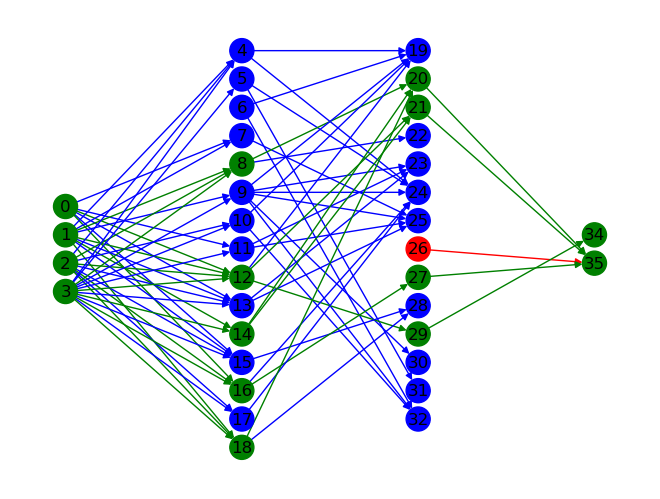

#unproductive params(frag): 0, []
#unproductive params(prod): 66, []
unpr : {'existing': {(5, 24): 2, (10, 32): 2, (4, 24): 2, (16, 24): 2, 24: 2, (17, 24): 2, 32: 2, (9, 32): 2, (9, 24): 2, (6, 32): 2, 22: 1, 23: 1, 30: 1, (11, 23): 1, (9, 23): 1, (13, 23): 1, (8, 22): 1, (9, 30): 1, 4: 0, 5: 0, 6: 0, 7: 0, 9: 0, 10: 0, 11: 0, 13: 0, (12, 19): 0, 15: 0, 17: 0, (3, 13): 0, 19: 0, 25: 0, 28: 0, (1, 9): 0, 31: 0, (0, 11): 0, (2, 17): 0, (1, 15): 0, (18, 28): 0, (3, 9): 0, (7, 25): 0, (3, 15): 0, (0, 7): 0, (2, 4): 0, (9, 19): 0, (0, 13): 0, (2, 10): 0, (9, 25): 0, (13, 25): 0, (6, 19): 0, (3, 11): 0, (4, 19): 0, (3, 17): 0, (1, 4): 0, (1, 13): 0, (0, 15): 0, (3, 4): 0, (3, 10): 0, (5, 31): 0, (2, 13): 0, (11, 25): 0, (15, 28): 0, (3, 5): 0, (1, 7): 0, (10, 19): 0, (2, 15): 0}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0, (18, 23): 0, (5, 30): 0, (16, 32): 1, (17, 32): 1, (13, 22): 0, (16, 30): 0, (4, 33): 0, 33: 0, (11, 24): 1, (11, 30): 0}}
zomb : {'existing': {26: 0, (26, 35): 0},

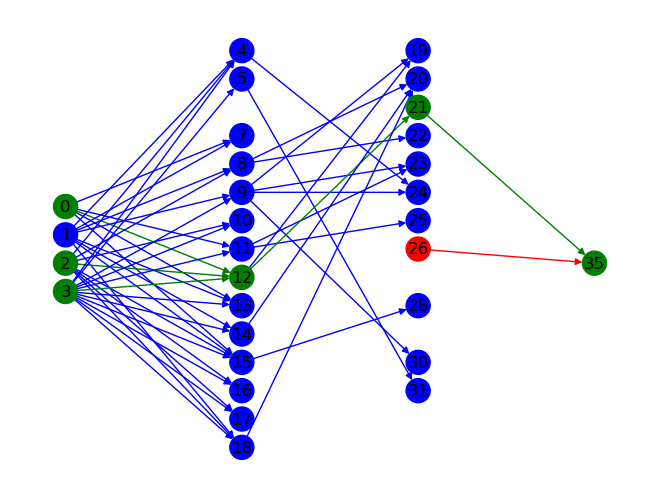

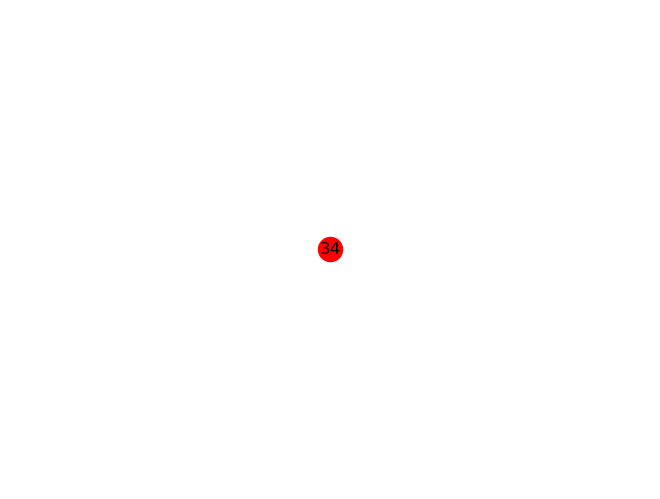

#unproductive params(frag): 2, [(6, 32), 6]
#unproductive params(prod): 69, [(6, 32), 6]
unpr : {'existing': {(4, 24): 3, 24: 3, (9, 24): 3, (6, 32): 3, 22: 2, 23: 2, 30: 2, (11, 23): 2, (9, 23): 2, (8, 22): 2, (9, 30): 2, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1, 11: 1, 13: 1, (12, 19): 1, 15: 1, 17: 1, (3, 13): 1, 19: 1, 25: 1, 28: 1, (1, 9): 1, 31: 1, (0, 11): 1, (2, 17): 1, (1, 15): 1, (3, 9): 1, (3, 15): 1, (0, 7): 1, (2, 4): 1, (9, 19): 1, (0, 13): 1, (2, 10): 1, (3, 11): 1, (3, 17): 1, (1, 4): 1, (1, 13): 1, (0, 15): 1, (3, 4): 1, (3, 10): 1, (5, 31): 1, (11, 25): 1, (15, 28): 1, (3, 5): 1, (1, 7): 1, (2, 15): 1, 1: 0, 8: 0, 14: 0, 16: 0, 18: 0, 20: 0, (2, 8): 0, (1, 18): 0, (3, 16): 0, (3, 18): 0, (1, 8): 0, (18, 20): 0, (8, 20): 0, (2, 16): 0, (1, 14): 0, (3, 14): 0, (14, 20): 0, (2, 18): 0}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0, (18, 23): 0, (5, 30): 0, (16, 32): 1, (17, 32): 1, (13, 22): 0, (16, 30): 0, (4, 33): 0, 33: 0, (11, 24): 1, (11, 30): 0, 32: 2, (9, 32): 2, (

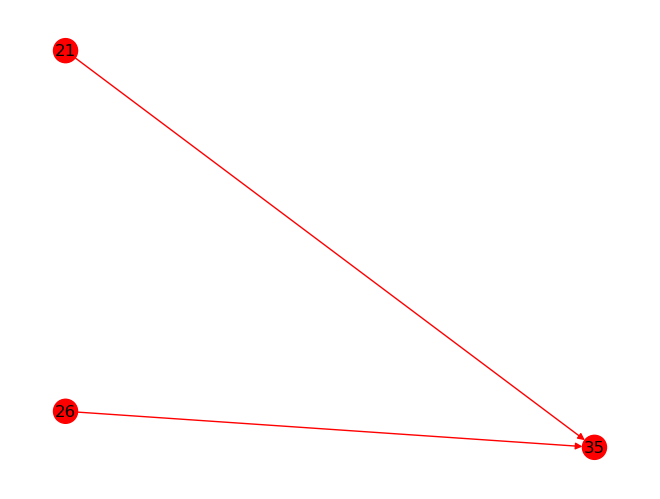

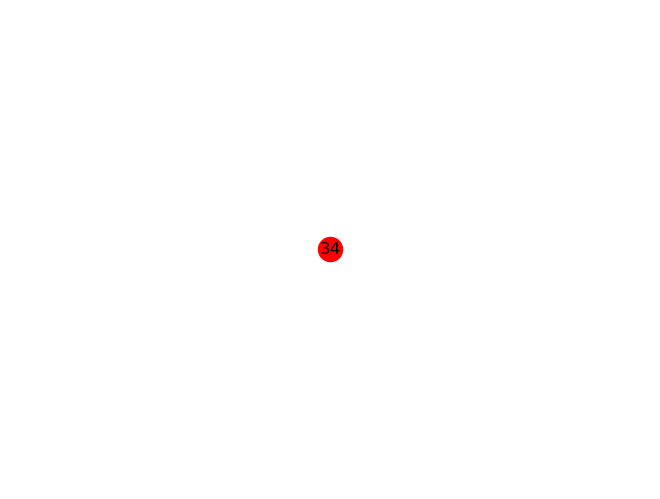

#unproductive params(frag): 39, [(0, 7), (0, 11), (0, 12), (0, 13), (0, 15), (1, 4), (1, 7), (1, 8), (1, 9), (1, 13), (1, 15), (1, 18), (2, 4), (2, 8), (2, 10), (2, 12), (2, 15), (2, 16), (2, 17), (2, 18), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (12, 19), 8, 12, 13, 14, 17, 18, 6]
#unproductive params(prod): 39, [(0, 7), (0, 11), (0, 12), (0, 13), (0, 15), (1, 4), (1, 7), (1, 8), (1, 9), (1, 13), (1, 15), (1, 18), (2, 4), (2, 8), (2, 10), (2, 12), (2, 15), (2, 16), (2, 17), (2, 18), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (12, 19), 8, 12, 13, 14, 17, 18, 6]
unpr : {'existing': {6: 2, 13: 2, (12, 19): 2, 17: 2, (1, 9): 2, (0, 11): 2, (2, 17): 2, (1, 15): 2, (3, 9): 2, (3, 15): 2, (0, 7): 2, (2, 4): 2, (0, 13): 2, (2, 10): 2, (3, 11): 2, (3, 17): 2, (1, 4): 2, (1, 13): 2, (0, 15): 2, (3, 4): 2, (3, 10): 2, (3, 5): 2, (1, 7): 2, (2, 15): 2, 8: 1, 14: 1, 18: 1, (2, 8): 1, (1, 18)

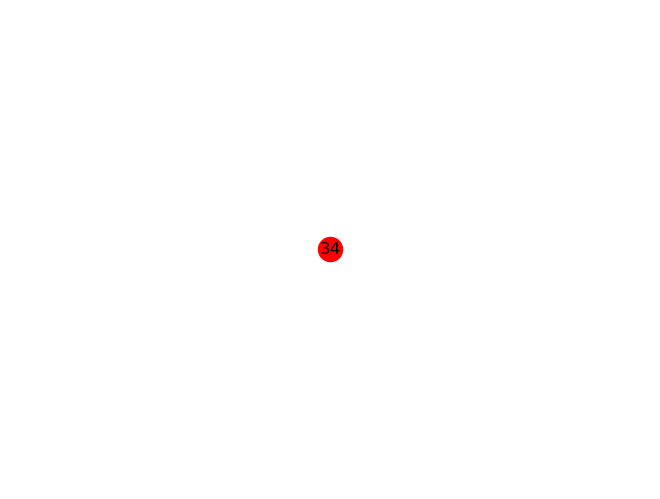

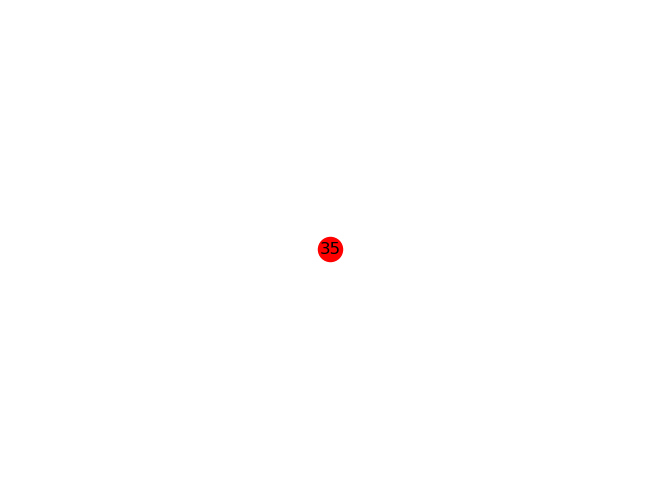

#unproductive params(frag): 29, [(0, 7), (0, 11), (0, 12), (0, 15), (1, 7), (1, 9), (1, 13), (1, 18), (2, 4), (2, 8), (2, 10), (2, 12), (2, 15), (2, 16), (2, 17), (2, 18), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 12, 13, 14, 17, 18]
#unproductive params(prod): 29, [(0, 7), (0, 11), (0, 12), (0, 15), (1, 7), (1, 9), (1, 13), (1, 18), (2, 4), (2, 8), (2, 10), (2, 12), (2, 15), (2, 16), (2, 17), (2, 18), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 12, 13, 14, 17, 18]
unpr : {'existing': {13: 3, 17: 3, (1, 9): 3, (0, 11): 3, (2, 17): 3, (3, 9): 3, (0, 7): 3, (2, 4): 3, (2, 10): 3, (3, 11): 3, (1, 13): 3, (0, 15): 3, (3, 4): 3, (3, 10): 3, (3, 5): 3, (1, 7): 3, (2, 15): 3, 14: 2, 18: 2, (2, 8): 2, (1, 18): 2, (3, 16): 2, (2, 16): 2, (3, 14): 2, (2, 18): 2, 12: 1, (0, 12): 1, (2, 12): 1, (3, 12): 1}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0, (18, 23): 0, (5, 30): 0, (16, 32): 1, (17, 32): 1, (13, 22): 0, (16, 30): 0, (4, 33): 0, 33

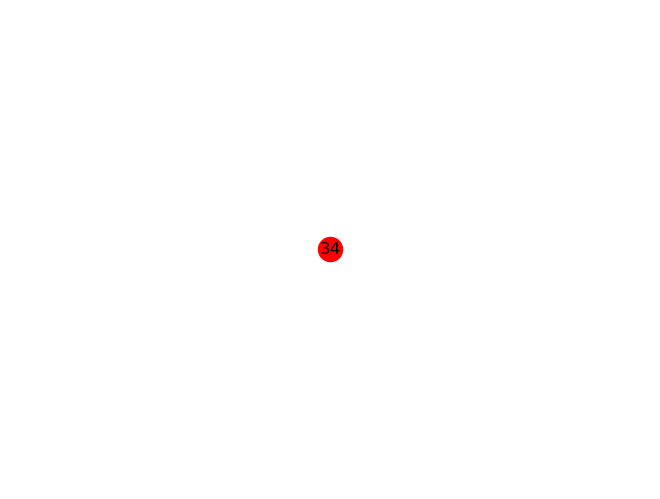

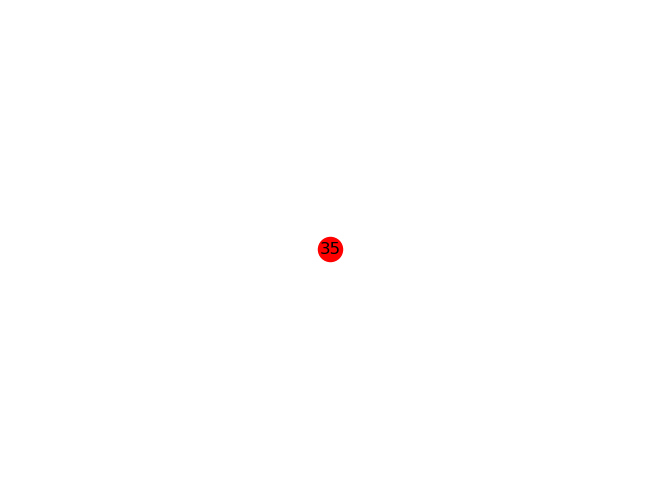

#unproductive params(frag): 20, [(0, 7), (0, 15), (1, 9), (1, 13), (1, 18), (2, 4), (2, 10), (2, 12), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 13, 14, 18, 17]
#unproductive params(prod): 20, [(0, 7), (0, 15), (1, 9), (1, 13), (1, 18), (2, 4), (2, 10), (2, 12), (3, 4), (3, 5), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 13, 14, 18, 17]
unpr : {'existing': {13: 4, 17: 4, (1, 9): 4, (3, 9): 4, (0, 7): 4, (2, 4): 4, (2, 10): 4, (3, 11): 4, (1, 13): 4, (0, 15): 4, (3, 4): 4, (3, 10): 4, (3, 5): 4, 14: 3, 18: 3, (1, 18): 3, (3, 16): 3, (3, 14): 3, (2, 12): 2, (3, 12): 2}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0, (18, 23): 0, (5, 30): 0, (16, 32): 1, (17, 32): 1, (13, 22): 0, (16, 30): 0, (4, 33): 0, 33: 0, (11, 24): 1, (11, 30): 0, 32: 2, (9, 32): 2, (18, 28): 0, (7, 25): 0, (9, 25): 0, (10, 32): 2, (16, 24): 2, (13, 25): 0, (6, 19): 0, (4, 19): 0, (17, 24): 2, (13, 23): 1, (5, 24): 2, (2, 13): 0, (10, 19): 0, 1: 0, 4: 1, 5: 1, 7: 1, 9: 1, 10: 1,

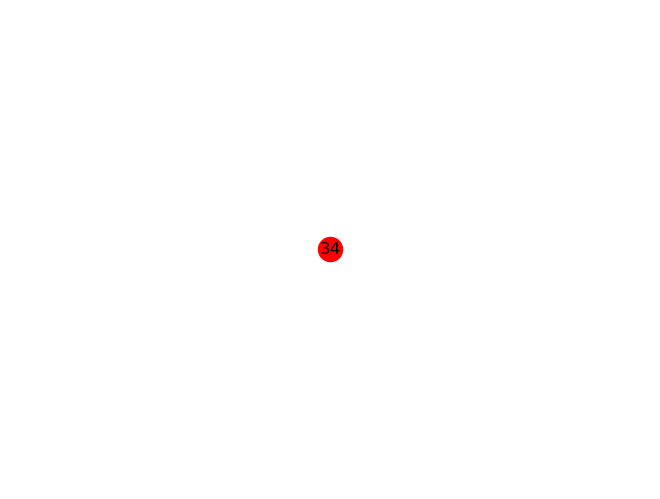

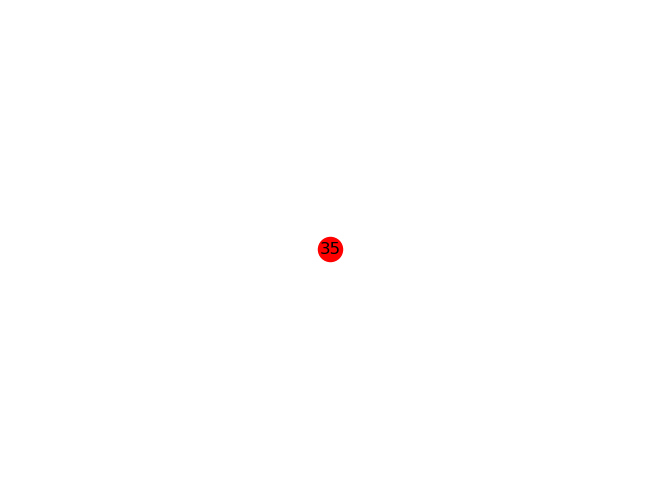

#unproductive params(frag): 14, [(0, 7), (1, 9), (1, 13), 13, (2, 4), (2, 10), (3, 5), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 17, 18]
#unproductive params(prod): 14, [(0, 7), (1, 9), (1, 13), 13, (2, 4), (2, 10), (3, 5), (3, 10), (3, 11), (3, 12), (3, 14), (3, 16), 17, 18]
unpr : {'existing': {13: 5, 17: 5, (1, 9): 5, (0, 7): 5, (2, 4): 5, (2, 10): 5, (3, 11): 5, (1, 13): 5, (3, 10): 5, (3, 5): 5, 18: 4, (3, 16): 4, (3, 14): 4, (3, 12): 3}, 'pruned': {(10, 24): 0, (11, 32): 0, (15, 32): 0, (18, 23): 0, (5, 30): 0, (16, 32): 1, (17, 32): 1, (13, 22): 0, (16, 30): 0, (4, 33): 0, 33: 0, (11, 24): 1, (11, 30): 0, 32: 2, (9, 32): 2, (18, 28): 0, (7, 25): 0, (9, 25): 0, (10, 32): 2, (16, 24): 2, (13, 25): 0, (6, 19): 0, (4, 19): 0, (17, 24): 2, (13, 23): 1, (5, 24): 2, (2, 13): 0, (10, 19): 0, 1: 0, 4: 1, 5: 1, 7: 1, 9: 1, 10: 1, 11: 1, 15: 1, (3, 13): 1, 19: 1, (4, 24): 3, 22: 2, 23: 2, 24: 3, 25: 1, 20: 0, 28: 1, 30: 2, 31: 1, (11, 23): 2, (9, 23): 2, (9, 19): 1, 16: 0, (18, 20): 0, 

In [146]:
for i in range(10):
    gm.update(model)
    gm.print_info()
    prune.global_unstructured(
        parameters=params, 
        pruning_method=prune.L1Unstructured, 
        amount=.3
    )

In [147]:
config = {'task_description' : (('moons' , (2, 1)), ('circles', (2, 1)))}


G = build_graph_from_model(model, shape)

# map the tasks to the network features
task_description = map_tasks_to_features(
    config['task_description'], 
    in_features, 
    out_features
)

# split the network into subnetworks
subnetworks = split_into_subnetworks(G)

# sort the networks by productivity
productive, not_productive = sort_by_productivity(
    subnetworks, out_features
)

print(f'#productive: {len(productive)}')
print(f'#unproductive: {len(not_productive)}')
print('Unproductive parameters:')
for g in not_productive:
    params = get_param_ids(g)
    print(g, params)

task_coverage = []
for g in productive:
    coverage = get_task_coverage(g, task_description, input_layer, output_layer)
    task_coverage.append(coverage)

print(f'Task Coverage: \n {task_coverage}')

print()
print('Productive parameters:')
for g in productive:
    print(g)

    pg = get_productive_subgraph(g, out_features)
    unprod_features, unprod_weights = get_difference(g, pg)
    unproductive_params = unprod_features + unprod_weights

    nzg = get_non_zombious_subnetwork(pg, in_features)
    zombie_features, zombie_weights = get_difference(pg, nzg)
    zombie_params = zombie_features + zombie_weights

    print('unproductive  :', unproductive_params)

    node_colors = []
    for feature in g.nodes():
        if feature in unproductive_params: node_colors.append('blue')
        elif feature in zombie_params: node_colors.append('red')
        else: node_colors.append('green')  # Default color for other nodes

    edge_colors = []
    for weight in g.edges():
        if weight in unproductive_params: edge_colors.append('blue')
        elif weight in zombie_params: edge_colors.append('red')
        else: edge_colors.append('green')  # Default color for other nodes

    pos=nx.multipartite_layout(G, LAYER)
    nx.draw(g, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
    plt.show()

NameError: name 'in_features' is not defined